In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt



In [2]:
print(tf.__version__)

2.0.0


In [3]:
tf.config.experimental.list_physical_devices('GPU')

[]

In [4]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [5]:
metadata.splits


{'test': <tfds.core.SplitInfo num_examples=10000>,
 'train': <tfds.core.SplitInfo num_examples=60000>}

In [6]:
train_data, test_data = dataset['train'] , dataset['test']

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [8]:
metadata

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [9]:
print("{} train examples".format(metadata.splits['train'].num_examples))
print("{} test examples".format(metadata.splits['test'].num_examples))

60000 train examples
10000 test examples


### preprocess data

In [10]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

In [11]:
train_data = train_data.map(normalize)
test_data = test_data.map(normalize)

In [12]:
train_data = train_data.cache()
test_data = test_data.cache()

### Explore processed data

In [13]:
for image, label in test_data.take(1):
    break

In [14]:
image = image.numpy().reshape(28,28)

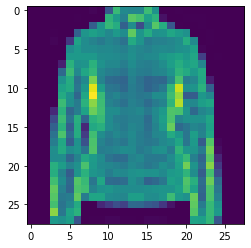

In [15]:
plt.imshow(image)
plt.grid(False)
plt.show()

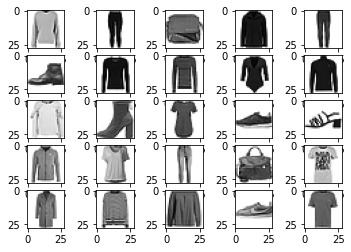

In [16]:
i =0
for (image, label) in train_data.take(25):
    plt.subplot(5,5, i+1)
    image = image.numpy().reshape(28,28)
    plt.imshow(image, cmap = plt.cm.binary)
    
    i +=1
plt.show()

### Build the model

In [17]:
input_layer = tf.keras.layers.Flatten(input_shape=(28,28,1))
hidden_layer = tf.keras.layers.Dense(units = 128, activation=tf.nn.relu)
output_layer = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)

In [18]:
model = tf.keras.Sequential([input_layer, hidden_layer, output_layer])

In [19]:
optim = tf.keras.optimizers.Adam(0.1)

In [20]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = optim, 
             metric="accuracy")

In [21]:
BATCH_SIZE = 32
train_data = train_data.repeat().shuffle(2000).batch(BATCH_SIZE)
test_data = test_data.batch(BATCH_SIZE)

In [22]:
steps = math.ceil(2000/BATCH_SIZE)

In [ ]:
model.fit(train_data, epochs=1, steps_per_epoch=steps)

Train for 63 steps


In [24]:
dd= test_data.take(1)

In [25]:
for img, label in dd:
    print(label)

tf.Tensor([4 4 9 7 5 1 0 5 7 4 0 8 2 3 9 0 7 7 2 2 0 4 4 4 2 7 7 4 2 4 7 5], shape=(32,), dtype=int64)


In [26]:
len(label)

32

In [27]:
tf.keras.layers.Flatten()